Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [183]:
import pandas as pd
import numpy as np
import math

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [184]:
m = df.gender.value_counts()['Male']
f = df.gender.value_counts()['Female']
total = df.gender.count()
print(f'{round(m / total, 5)*100}% of men')
print(f'{round(f / total, 5) * 100}% of women')

50.476% of men
49.524% of women


##### 2. Какое количество уникальных значений у поля InternetService?

In [185]:
print('Number of unique values of InternetService field:',df.InternetService.describe()['unique'])

Number of unique values of InternetService field: 3


##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [186]:
# df.TotalCharges.dtype
try:
    print(df.TotalCharges.median(), 
          df.TotalCharges.mean(),
          df.TotalCharges.std())
except TypeError or ValueError as e:
    print('TypeError: Could not convert string to float')

TypeError: Could not convert string to float


In [187]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [188]:
df.describe(include='all')['TotalCharges']
print(f'min: {df.TotalCharges.min()}\tmax: {df.TotalCharges.max()}')

print(f'mean:', df.TotalCharges.mean(), f'\nmedian:', df.TotalCharges.median(), f'\nstd:', df.TotalCharges.std())

min: 18.8	max: 8684.8
mean: 2283.3004408418697 
median: 1397.475 
std: 2266.7713618831453


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [189]:
df['PhoneService'] = df['PhoneService'].replace({'Yes':1, 'No':0})

In [190]:
df['PhoneService'].head(5)

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [191]:
# здесь приведение к типу float32 повлияет на замену пробелов 

In [192]:
df['TotalCharges'] = df['TotalCharges'].astype('float32')
df.TotalCharges.dtype

dtype('float32')

In [193]:
df.TotalCharges.fillna(0, inplace=True)
df.TotalCharges.isna().sum()

0

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [194]:
df.Churn.replace({'Yes': 1, 'No': 0}, inplace=True)
df.Churn.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [195]:
to_binary = {'Yes': 1, 'No': 0, 'No internet service': 0}
cols_to_bin = ['StreamingMovies', 'StreamingTV', 'TechSupport'] 

for c in cols_to_bin:
    df[c].replace(to_binary, inplace=True)

In [196]:
df[cols_to_bin].head(5)

,StreamingMovies,StreamingTV,TechSupport
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0


##### 8. Заполните пропуски в поле PhoneService значением 0

In [197]:
df.PhoneService.isna().sum() # пропусков нет

0

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [198]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [199]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=.3, random_state=42)

In [200]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 7), (2113, 7), (4930,), (2113,))

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ], verbose=True)

gender.fit(X_train)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing ohe, total=   0.0s


Pipeline(steps=[('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))],
         verbose=True)

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [202]:
gender.fit_transform(X_train, y_train)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing ohe, total=   0.0s


,gender_Female,gender_Male
1695,0,1
1095,0,1
3889,0,1
3667,1,0
2902,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

Ответ: нормированные и центрированные данные будут иметь среднее в нуле и среднеквадратичное отклонение 1. Это будет работать, если распределение значений будет следовать нормальному и если нет сильных выбросов.

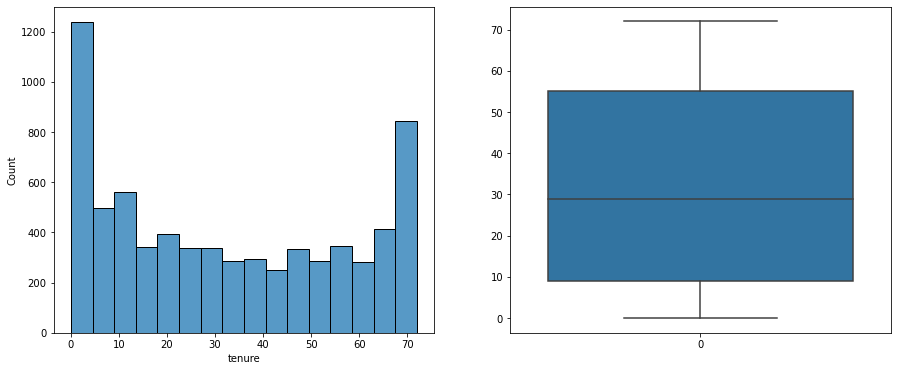

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt 

f, axes = plt.subplots(1, 2, figsize = (15,6));

sns.histplot(df.tenure, ax=axes[0]);
sns.boxplot(data=df.tenure, ax=axes[1]);

In [204]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [205]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
                ])

Объединение всех "кубиков" очень легко сделать таким образом

In [206]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [207]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing ohe, total=   0.0s


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [216]:
pred_proba = pipeline.predict_proba(X_test)
pred_proba

array([[0.29, 0.71],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.93, 0.07],
       [0.23, 0.77],
       [0.94, 0.06]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [219]:
from sklearn.metrics import roc_auc_score, log_loss


pred = pipeline.predict(X_test)

print('roc_auc_score:', roc_auc_score(y_true=y_test, y_score=pred))
print('logloss:', log_loss(y_true=y_test, y_pred=pred_proba))

roc_auc_score: 0.6742448940780135
logloss: 0.7093274250972613


### Сохраним наш пайплайн

In [222]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)